# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
api_key = os.getenv('news_api')

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
print(api_key)

602ec45fa1bb4e5b9a795e055fad1e76


In [5]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin", language="en")

In [6]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="ethereum", language="en")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bc_df = pd.DataFrame(bitcoin_sentiments)

In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(ethereum_sentiments)

In [9]:
# Describe the Bitcoin Sentiment
bc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.091585,0.059550,0.079700,0.860700
std,0.401681,0.062411,0.078177,0.104845
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.381800,0.000000,0.039000,0.827000
50%,-0.162400,0.049000,0.063000,0.888000
75%,0.156025,0.085000,0.103750,0.930250
max,0.750600,0.202000,0.300000,0.964000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.055585,0.039550,0.046150,0.91440
std,0.365057,0.055696,0.044724,0.05249
min,-0.690800,0.000000,0.000000,0.82200
25%,-0.273200,0.000000,0.000000,0.86350
50%,-0.127900,0.000000,0.050000,0.93600
75%,0.109025,0.066000,0.068250,0.95425
max,0.690800,0.178000,0.178000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had a higher mean positive score of .059

Q: Which coin had the highest compound score?

A: Ethereum had a higher compound score of -.05

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score of .17

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Set up lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
def tokenizer(text):
   """Tokenizes text."""
   
   # Create a list of the words
   words = word_tokenize(text)
    
   # Convert the words to lowercase
   words = list(filter(lambda w: w.lower(), words))
   
   # Remove the punctuation
   words = list(filter(lambda t: t not in punctuation, words))
   
   # Remove the stopwords
   words = list(filter(lambda t: t.lower() not in stop, words))
   
   # Lemmatize Words into root words
   tokens = [wnl.lemmatize(word) for word in words]
   
   return tokens

In [14]:
# Create a new tokens column for Bitcoin
bc_df["tokens"] = bc_df.text.apply(tokenizer)

In [15]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.text.apply(tokenizer)

eth_df.head(5)

,text,date,compound,positive,negative,neutral,tokens
0,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.000,0.865,"[Meta, revealed, NFTs, work, Instagram, US-bas..."
1,GameStop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960,"[GameStop, officially, thrown, headlong, web3,..."
2,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[multi-billion, dollar, cryptocurrency, compan..."
3,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945,"[Bored, Ape, Yacht, Club, creator, Yuga, Labs,..."
4,GameStop is going all-in on crypto. The video ...,2022-05-23,0.1280,0.046,0.000,0.954,"[GameStop, going, all-in, crypto, video, game,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
n=2
bitcoin_grams = ngrams(tokenizer(bc_df.text.str.cat()), n)
Counter(bitcoin_grams).most_common(10)

[(('Reuters', 'Bitcoin'), 5),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('char', 'May'), 4),
 (('Getty', 'Images'), 2),
 (('dramatic', 'drop'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
n=2
ethereum_grams = ngrams(tokenizer(eth_df.text.str.cat()), n)
Counter(ethereum_grams).most_common(10)

[(('Reuters', 'Bitcoin'), 4),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('char', 'May'), 3),
 (('char', 'GameStop'), 2),
 (('Yuga', 'Labs'), 2)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
btc_all = tokenizer(bc_df.text.str.cat())
token_count(btc_all, 10)

[('char', 19),
 ('Bitcoin', 12),
 ('cryptocurrency', 10),
 ('world', 6),
 ('week', 6),
 ('Reuters', 6),
 ('biggest', 5),
 ('bitcoin', 4),
 ('investor', 4),
 ('dropped', 4)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
eth_all = tokenizer(eth_df.text.str.cat())
token_count(eth_all, 10)

[('char', 20),
 ('cryptocurrency', 10),
 ('Bitcoin', 10),
 ('Ethereum', 6),
 ('Reuters', 6),
 ('world', 6),
 ('biggest', 5),
 ('NFT', 4),
 ('May', 4),
 ('week', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

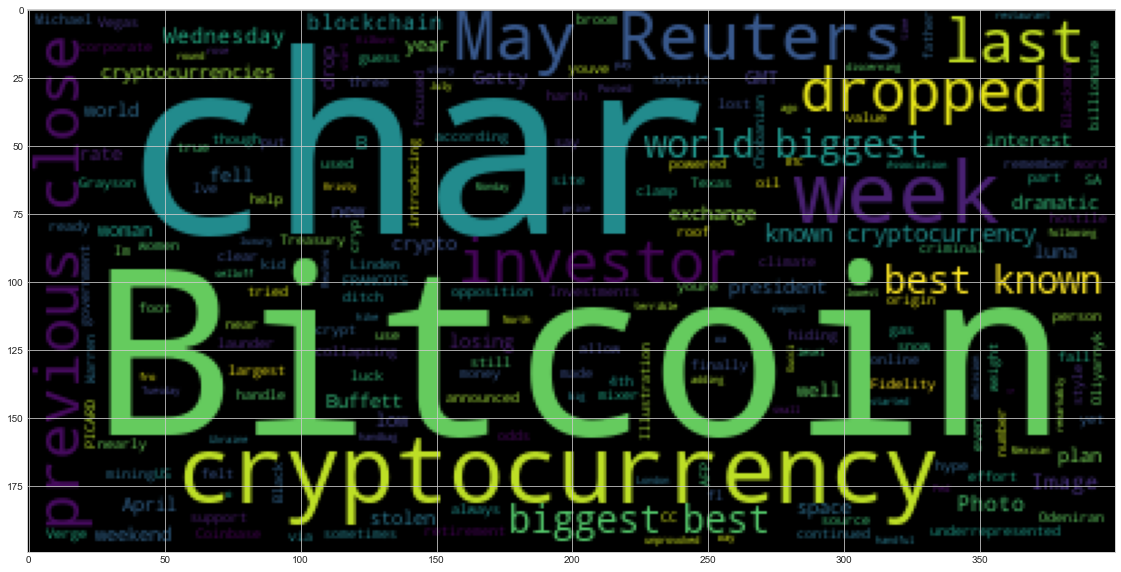

In [23]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(bc_df['text']))
    )
)
plt.imshow(wc_btc);

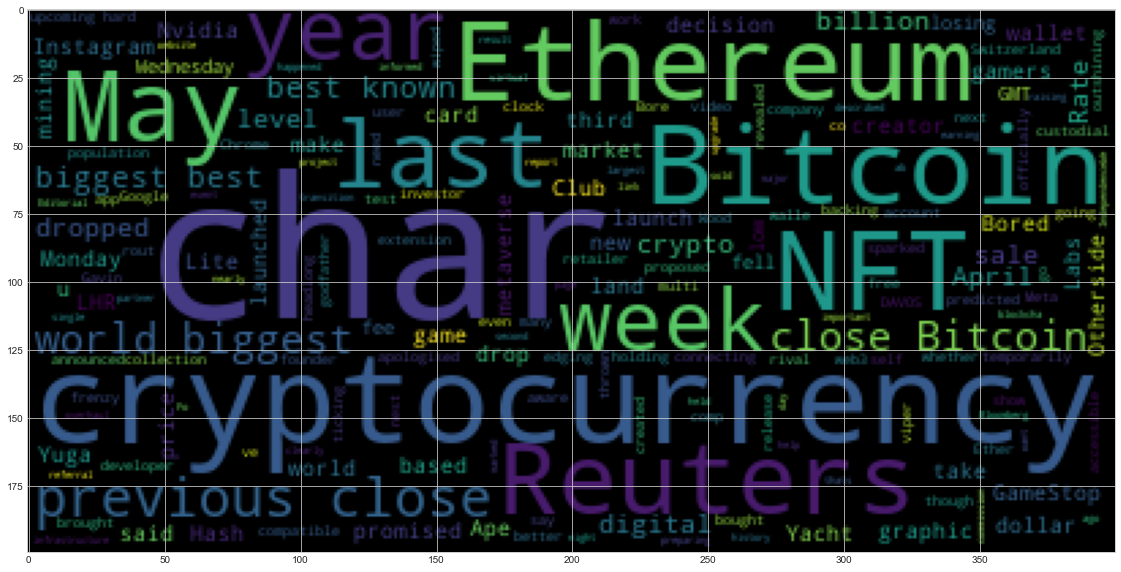

In [24]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(eth_df['text']))
    )
)
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [42]:
import spacy
from spacy import displacy
jupyter = True

In [26]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
doc = nlp(bc_df.text.str.cat())

In [40]:
# Run the NER processor on all of the text
displacy.render(doc, style='ent')

# Add a title to the document
doc.user_data['title'] = 'Bitcoin Named Entity Recognition'

In [43]:
# Render the visualization
html = displacy.render([doc], style = "dep", jupyter=True)

In [31]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'ORG'])

['FRANCOIS PICARD/AFP', 'Getty Images', 'Getty Images\r\n', 'Fidelity Investments', 'the US Treasury', 'Oliyarnyk / CC-BY-SA-4.0', 'the Blockchain Association of Ukraine', 'Bitcoin', 'Reuters', '+361 chars]May 4', 'Reuters', 'Reuters', 'Fed', 'Reuters', '+2779 chars]May', 'Reuters', 'Reuters', 'Nike', 'the digital asset exchange', 'FTX']


---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
doc_eth = nlp(eth_df.text.str.cat())

In [38]:
# Run the NER processor on all of the text
displacy.render(doc, style='ent')

# Add a title to the document
doc.user_data['title'] = 'Ethereum Named Entity Recognition'

In [44]:
# Render the visualization
html = displacy.render([doc_eth], style = "dep", jupyter=True)

In [35]:
# List all Entities
print([ent.text for ent in doc_eth.ents if ent.label_ == 'ORG'])

['Meta', 'Instagram', 'Instagram', 'chars]GameStop', 'Ethereum', 'Yacht Club', 'NFT', 'Ethereum', 'Reuters', 'Reuters', 'LHR', 'Ethereum', 'Reuters', 'Reuters', '+339 chars]May 11', 'Reuters', '+361 chars]May 9', 'Reuters', 'Nvidia', 'LHR', 'NFT', 'Ethereum', 'Fed', 'NFT']


---